# UC San Diego: Data Science in Practice - Data Checkpoint
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

## UCSD Grade Inflation

# Names

- Emi Lee
- Cindy Luu
- Erwin Miguel Olimpo
- Neda Emdad
- Calvin Nguyen
- Diya Lakhani

<a id='research_question'></a>
# Research Question

How have UCSD students' grade point averages (GPAs) change across various upper division and lower division courses between the years 2007-2022? What factors have influenced these changes, considering the effects of:

* (1) the recent COVID-19 pandemic on student GPAs
* (2) the 2022 UCSD Academic Worker Strike on student GPAs
* (3) the emergence of ChatGPT


# Dataset(s)


- Dataset Name: UCSD CAPEs Data
- Link to the dataset: https://www.kaggle.com/datasets/sanbornpnguyen/ucsdcapes?utm_medium=social&utm_campaign=kaggle-dataset-share
- Number of observations: 63363 rows

The UCSD CAPEs Data is our primary dataset and it contains all the CAPE evaluations from 2007 to 2023 scraped from the CAPEs website  https://capes.ucsd.edu. The dataset contains information about instructors, recommendation rates, average grade recieved, etc. We plan on extracting columns that detail the course name, average grade recieved, and the quarter.

Note: As of this first checkpoint, this one dataset is sufficient to answer the question. However, we may add more datasets later as we are doing the analysis depending on what is required.

# Data Wrangling

The first step is to import the appropriate modules and convert the data from the CSV file to a dataframe.

In [56]:
#importing relevant data libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import plotly.express as px

#converting data from csv file to pandas dataframe
capes = pd.read_csv('raw_data/capes_data.csv')

In [57]:
#defaults for plots
plt.rcParams["figure.figsize"] = (20, 8)

In [58]:
capes.head()

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Evalulation URL
0,Butler Elizabeth Annette,AAS 10 - Intro/African-American Studies (A),SP23,66,48,93.5%,100.0%,2.80,A- (3.84),B+ (3.67),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
1,Butler Elizabeth Annette,AAS 170 - Legacies of Research (A),SP23,20,7,100.0%,100.0%,2.50,A- (3.86),A- (3.92),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
2,Jones Ian William Nasser,ANAR 111 - Foundations of Archaeology (A),SP23,16,3,100.0%,100.0%,3.83,B+ (3.67),NaN,https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
3,Shtienberg Gilad,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0%,83.3%,3.83,B+ (3.50),B (3.07),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
4,Braswell Geoffrey E.,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0%,100.0%,5.17,A (4.00),A (4.00),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...


## Webscraping to create a data of subject dept code to department

In [59]:
html = requests.get(url="https://blink.ucsd.edu/instructors/courses/schedule-of-classes/subject-codes.html").content
soup = BeautifulSoup(html)
soup

<!DOCTYPE html>

<html lang="en-US" xmlns="http://www.w3.org/1999/xhtml">
<head>
<!-- Google Tag Manager -->
<script>
		(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
        new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
        j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
        'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-T2BRWXJ');
        </script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="initial-scale=1.0" name="viewport"/>
<meta content="7MiYjX2ZghMOWvtKRWlar--c6mD2ose5EcbQFQ6szFA" name="google-site-verification"/>
<title>Subject Codes</title>
<meta content="University of California, San Diego" name="ORGANIZATION"/>
<meta content="index,follow,noarchive" name="robots"/>
<meta content="Blink" name="SITE"/>
<meta content="Subject Codes" name="P

In [60]:
lst_dept_codes = [tag.text for tag in soup.find_all("td")]
lst_dept_codes

['AAPI',
 'Asian American and Pacific Islander Studies',
 'AAS',
 'African American Studies',
 'AESE',
 'Architecture Based Enterprise Systems Engineering',
 'AIP',
 'Academic Internship Program',
 'ANAR',
 'Anthropological Archaeology',
 'ANBI',
 'Anthropology/ Biological Anthropology',
 'ANES',
 'Anesthesiology',
 'ANSC',
 'Anthro/ Sociocultural Anthropology',
 'ANTH',
 'Anthropology',
 'ASTR',
 'Astronomy and Astrophysics',
 'AUD',
 'Audiology',
 'AWP',
 'Analytical\xa0Writing Program',
 'BENG',
 'Bioengineering',
 'BGGN',
 'Biology/ Grad/ General',
 'BGJC',
 'Biology/ Grad/ Journal Club',
 'BGRD',
 'Biology/ Grad/ Research Discussion',
 'BGSE',
 'Biology/ Grad/ Seminar',
 'BIBC',
 'Biology/ Biochemistry',
 'BICD',
 'Biology/ Genetics, Cellular and Developmental',
 'BIEB',
 'Biology/ Ecology, Behavior, and Evolutionary',
 'BILD',
 'Biology/ Lower Division',
 'BIMM',
 'Biology/ Molecular Biology, Microbiology',
 'BIOM',
 'Biomedical Sciences',
 'BIPN',
 'Biology/ Animal Physiology an

In [61]:
dict_code_to_dept = {}
for i in (range(len(lst_dept_codes)//2)):
    code = lst_dept_codes[2*i]
    dept = lst_dept_codes[2*i+1].replace('\xa0', ' ').replace('/','')
    dict_code_to_dept[code] = dept
dict_code_to_dept

{'AAPI': 'Asian American and Pacific Islander Studies',
 'AAS': 'African American Studies',
 'AESE': 'Architecture Based Enterprise Systems Engineering',
 'AIP': 'Academic Internship Program',
 'ANAR': 'Anthropological Archaeology',
 'ANBI': 'Anthropology Biological Anthropology',
 'ANES': 'Anesthesiology',
 'ANSC': 'Anthro Sociocultural Anthropology',
 'ANTH': 'Anthropology',
 'ASTR': 'Astronomy and Astrophysics',
 'AUD': 'Audiology',
 'AWP': 'Analytical Writing Program',
 'BENG': 'Bioengineering',
 'BGGN': 'Biology Grad General',
 'BGJC': 'Biology Grad Journal Club',
 'BGRD': 'Biology Grad Research Discussion',
 'BGSE': 'Biology Grad Seminar',
 'BIBC': 'Biology Biochemistry',
 'BICD': 'Biology Genetics, Cellular and Developmental',
 'BIEB': 'Biology Ecology, Behavior, and Evolutionary',
 'BILD': 'Biology Lower Division',
 'BIMM': 'Biology Molecular Biology, Microbiology',
 'BIOM': 'Biomedical Sciences',
 'BIPN': 'Biology Animal Physiology and Neuroscience',
 'BISP': 'Biology Special 

In [62]:
dict_code_to_dept["ELWR"]="Entry Level Writing Requirement"
dict_code_to_dept["JUDA"]="Jewish Studies"
dict_code_to_dept["FPMU"]="Family Medicine and Public Health"


Looking at the first few rows of our capes dataframe, there does not seem to be further data wrangling work required. We can shift to data clening. 

# Data Cleaning

Let's begin with checking the dimensions of our data set and the column names.

In [63]:
#returns dimensions of the dataframe
capes.shape

(63363, 11)

In [64]:
#returns column names
capes.columns

Index(['Instructor', 'Course', 'Quarter', 'Total Enrolled in Course',
       'Total CAPEs Given', 'Percentage Recommended Class',
       'Percentage Recommended Professor', 'Study Hours per Week',
       'Average Grade Expected', 'Average Grade Received', 'Evalulation URL'],
      dtype='object')

Our research question is focused on studying the changes in the GPA over various courses between the years 2007-2023. Columns detailing information about the instructor, recommendation rate, study hours, expected grades, evaluation URL, and total CAPEs given can be dropped from our dataset.

In [65]:
#dropping unecessary columns
capes = capes.drop(columns = ['Instructor', 'Percentage Recommended Class',
       'Percentage Recommended Professor', 'Study Hours per Week',
       'Average Grade Expected', 'Evalulation URL', 'Total Enrolled in Course',
       'Total CAPEs Given'])
capes.head()

,Course,Quarter,Average Grade Received
0,AAS 10 - Intro/African-American Studies (A),SP23,B+ (3.67)
1,AAS 170 - Legacies of Research (A),SP23,A- (3.92)
2,ANAR 111 - Foundations of Archaeology (A),SP23,NaN
3,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,B (3.07)
4,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,A (4.00)


There are some cases in which the professor for a course does not report the average grade received by the class. These entries appear as NaN values and those observations need to be dropped. Although, removing NaN values is a part of data wrangling, since we are only concerned about missing values in three columns it was necessary to strip unrequired columns first.

In [66]:
#checking for NaN values
capes.isnull().sum().any()

True

In [67]:
#dropping NaN rows
capes = capes.dropna()

#verifying that our dataframe is free of any missing values
capes.isnull().sum().any()

False

Grades in the 'Average Grade Recieved' column are of the form <letter_grade (GPA)>. In order to analyze how the GPA is changing overtime and take a mean of all the GPAs, we need to split the column into grade (as a string) and GPA (as a float).

In [68]:
#defining function to split the grade
def split_grade_gpa(string):
    lst1 = string.split("(")
    str1 = lst1[1].strip(")")
    return float(str1)

#helper function to extract grade
def split_grade(string):
    lst1 = string.split("(")
    return lst1[0].strip(" ")

cape_GPAs = capes['Average Grade Received'].apply(split_grade_gpa)
cape_grades = capes['Average Grade Received'].apply(split_grade)

#adding GPA column
capes['GPA'] = cape_GPAs
#adding grade column
capes['Grade'] = cape_grades

capes = capes.drop(columns=['Average Grade Received'])
capes.head()

,Course,Quarter,GPA,Grade
0,AAS 10 - Intro/African-American Studies (A),SP23,3.67,B+
1,AAS 170 - Legacies of Research (A),SP23,3.92,A-
3,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,3.07,B
4,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,4.00,A
5,ANBI 111 - Human Evolution (A),SP23,2.95,B-


Similarly, we require a column for department, whether a course is a lower division course or upper division course, and the year. This is so we can groupby quarter, department, and division taking a mean of the GPAs. Then in analysis we will compare the means of every department lower and upper division across every quarter since FA07.

In [69]:
#function to obtain department code
def dept_strip(string):
    lst1 = string.split(" ")
    return lst1[0]

#function to check for lower division / upper division
def ldud(string):
    lst1 = string.split(" ")
    if lst1[1].isalpha() == False:
        str_num = "".join(filter(lambda x: x.isalpha() == False, lst1[1]))
        if int(str_num) <= 99:
            return "LD"
        else:
            return "UD"
    else:
        if int(lst1[1]) <= 99:
            return "LD"
        else:
            return "UD"
    
dept_names = capes['Course'].apply(dept_strip)
upper_lower = capes['Course'].apply(ldud)

#creating a column for upper / lower division
capes['Division'] = upper_lower
#creating a column for department
capes['Dept'] = dept_names

In [70]:
# helper function to extract year from quarter column
def extract_year(string):
    ret_str = "20" + string[2:4]
    return int(ret_str)

years = capes['Quarter'].apply(extract_year)

#creating year column
capes['Year'] = years
capes.head()

,Course,Quarter,GPA,Grade,Division,Dept,Year
0,AAS 10 - Intro/African-American Studies (A),SP23,3.67,B+,LD,AAS,2023
1,AAS 170 - Legacies of Research (A),SP23,3.92,A-,UD,AAS,2023
3,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,3.07,B,UD,ANAR,2023
4,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,4.00,A,UD,ANAR,2023
5,ANBI 111 - Human Evolution (A),SP23,2.95,B-,UD,ANBI,2023


Let's rearrange the columns in an orderly manner so the quarter is the first column.

In [71]:
#rearranging the columns
capes = capes.get(['Quarter', 'Dept', 'Course', 'Division', 'Year', 'GPA', 'Grade'])
capes.head()

,Quarter,Dept,Course,Division,Year,GPA,Grade
0,SP23,AAS,AAS 10 - Intro/African-American Studies (A),LD,2023,3.67,B+
1,SP23,AAS,AAS 170 - Legacies of Research (A),UD,2023,3.92,A-
3,SP23,ANAR,ANAR 115 - Coastal Geomorphology/Environ (A),UD,2023,3.07,B
4,SP23,ANAR,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),UD,2023,4.00,A
5,SP23,ANBI,ANBI 111 - Human Evolution (A),UD,2023,2.95,B-


To compare the means for every department across lower division and upper division courses we need to groupby quarter, department and division. Before that, we are creating a capes_sub df that will not contain the letter grade columns since we cannot obtain a mean of that column.

In [72]:
#Computing the means per course per quater divided by division
capes_sub = capes.get(['Quarter', 'Dept', 'Division', 'Year', 'GPA'])
capes_sub = capes_sub.groupby(['Quarter', 'Dept', 'Division'], sort=False).mean().iloc[::-1].reset_index()
capes_sub = capes_sub[capes_sub['Year'] >= 2013]
capes_sub["Dept Name"] = capes_sub["Dept"].apply(lambda x: dict_code_to_dept[x])
capes_sub.head()


,Quarter,Dept,Division,Year,GPA,Dept Name
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning


In [73]:
capes_sub_wo_sum = capes_sub[~((capes_sub['Quarter'].str.contains("S1")) | (capes_sub['Quarter'].str.contains("S2")) | capes_sub['Quarter'].str.contains("S3"))]

For analysis we will begin with line plots to visualize the increase in GPA across the quarters and proceed with an ANOVA test to compare group means for our three subquestions.

# Data Analysis & Results (EDA)

### Overall GPA Avg by Quarter

In [74]:
capes_by_qtr = capes_sub.get(['Quarter', 'Year', 'GPA']).groupby("Quarter", sort=False).mean().reset_index()
capes_by_qtr

,Quarter,Year,GPA
0,WI13,2013.0,3.313521
1,SP13,2013.0,3.309703
2,S113,2013.0,3.205300
3,S213,2013.0,3.198214
4,S313,2013.0,3.728000
...,...,...,...
56,S222,2022.0,3.430904
57,S322,2022.0,3.535500
58,FA22,2022.0,3.504815
59,WI23,2023.0,3.493449


<Axes: xlabel='Quarter', ylabel='GPA'>

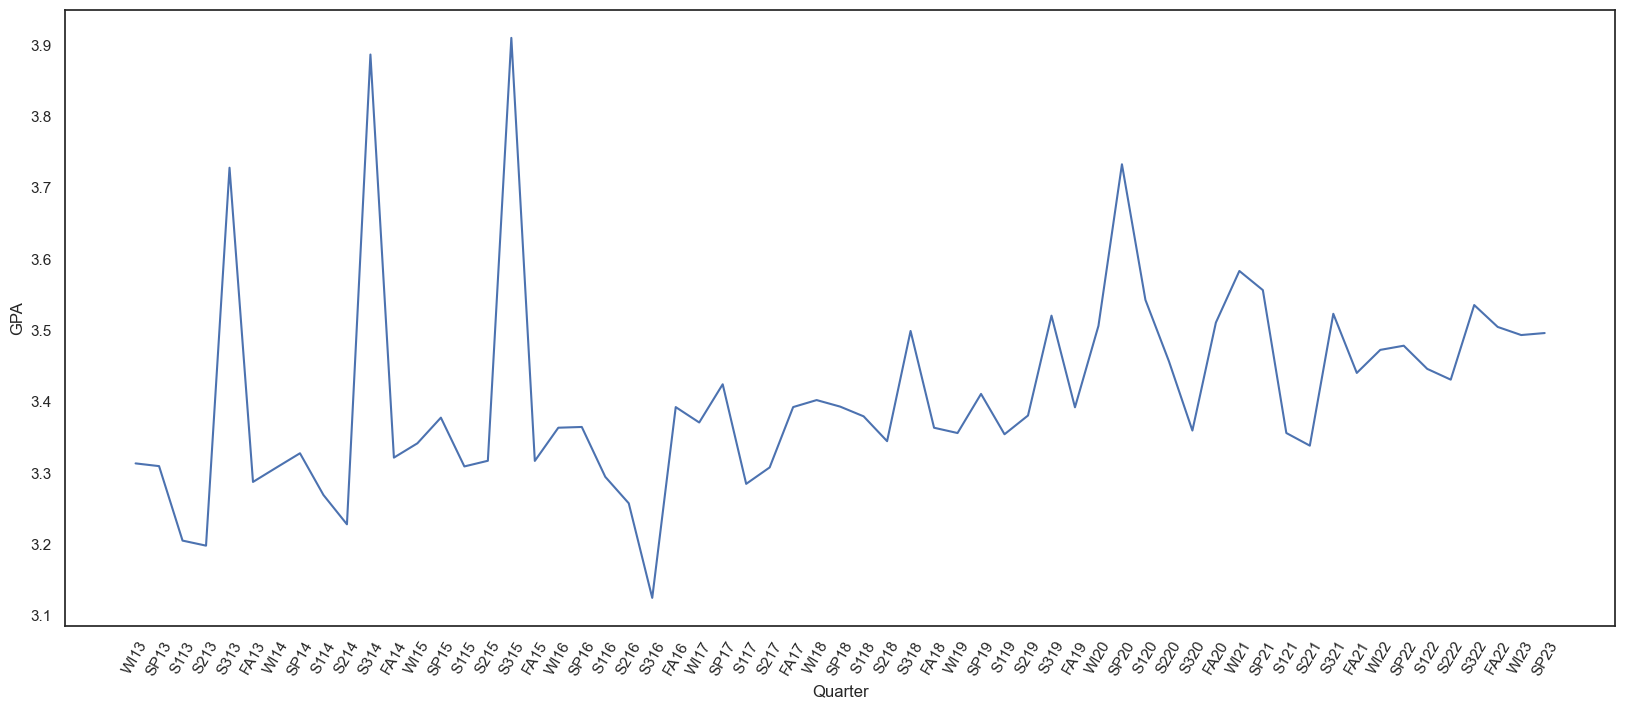

In [75]:
#grouped by quarter to get average GPA per quarter
plt.figure(figsize = (20,8))
plt.xticks(rotation=60)
#lineplot of avg GPA throughout quarters
sns.lineplot(data=capes_by_qtr, x="Quarter", y="GPA")
#summer has huge peaks for some reason so ill show lineplots where one contains summer and the other doesn't

In [76]:
capes_by_qtr_without_sum = capes_by_qtr[~((capes_by_qtr['Quarter'].str.contains("S1")) | (capes_by_qtr['Quarter'].str.contains("S2")) | capes_by_qtr['Quarter'].str.contains("S3"))]
capes_by_qtr_without_sum.head(10)

,Quarter,Year,GPA
0,WI13,2013.0,3.313521
1,SP13,2013.0,3.309703
5,FA13,2013.0,3.287535
6,WI14,2014.0,3.307740
7,SP14,2014.0,3.327724
11,FA14,2014.0,3.321618
12,WI15,2015.0,3.341683
13,SP15,2015.0,3.377655
17,FA15,2015.0,3.317013
18,WI16,2016.0,3.363539


<Axes: xlabel='Quarter', ylabel='GPA'>

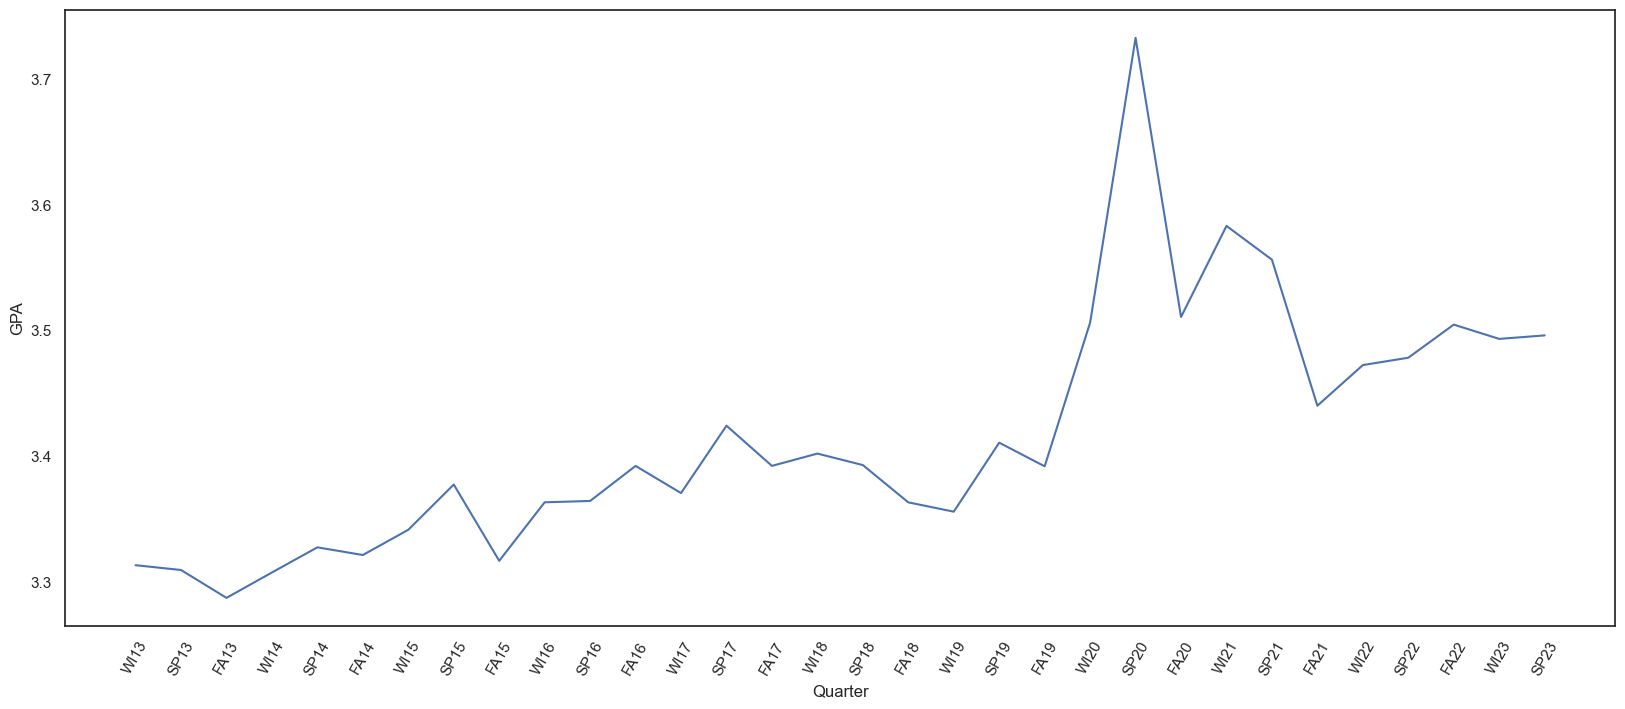

In [77]:
plt.xticks(rotation=60)
sns.lineplot(data=capes_by_qtr_without_sum, x="Quarter", y="GPA")

<Axes: xlabel='Quarter', ylabel='GPA'>

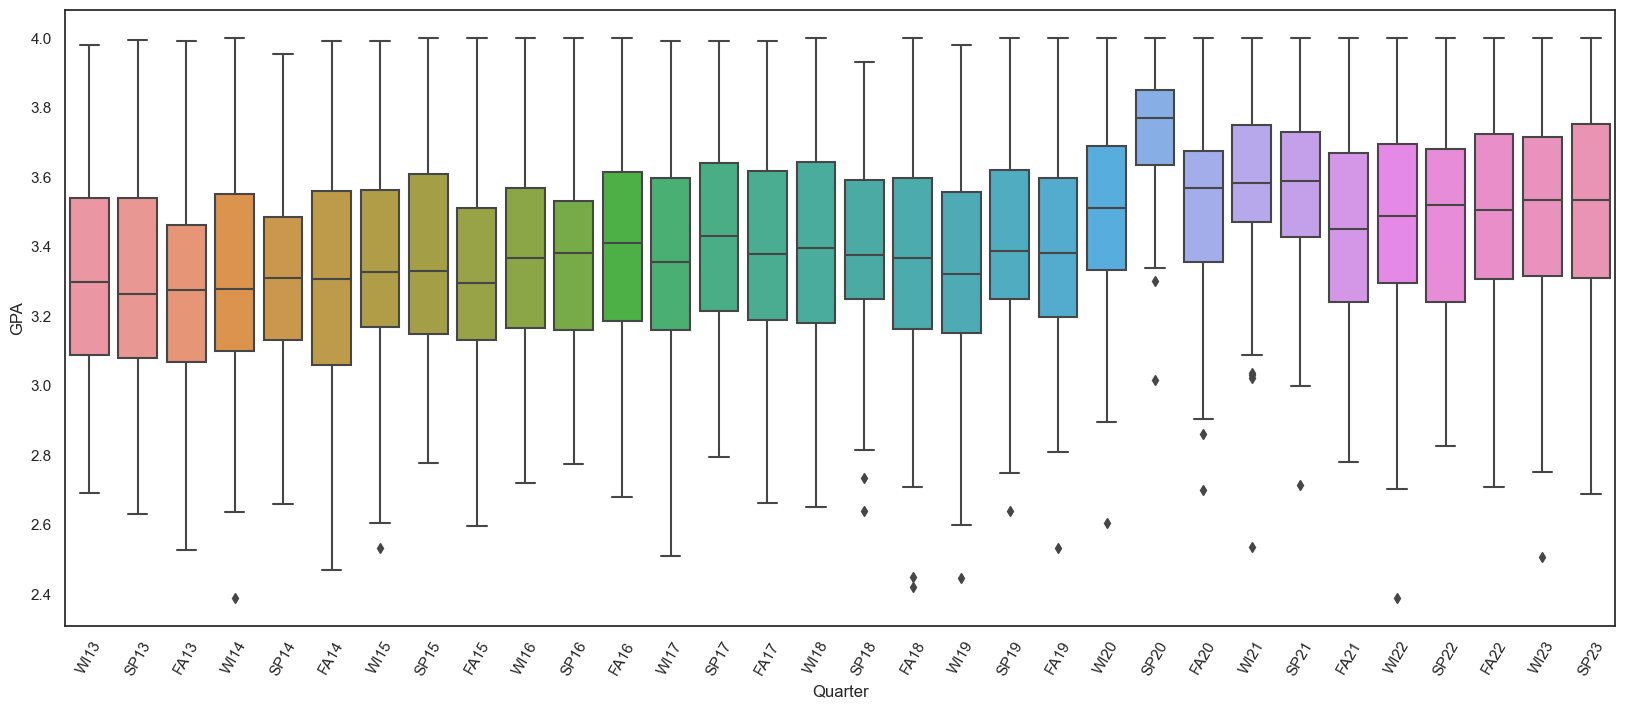

In [78]:
plt.xticks(rotation=60)
sns.boxplot(data=capes_sub_wo_sum, x="Quarter", y="GPA")
#boxplot of quarters

### Lower Divison

<Axes: xlabel='Quarter', ylabel='GPA'>

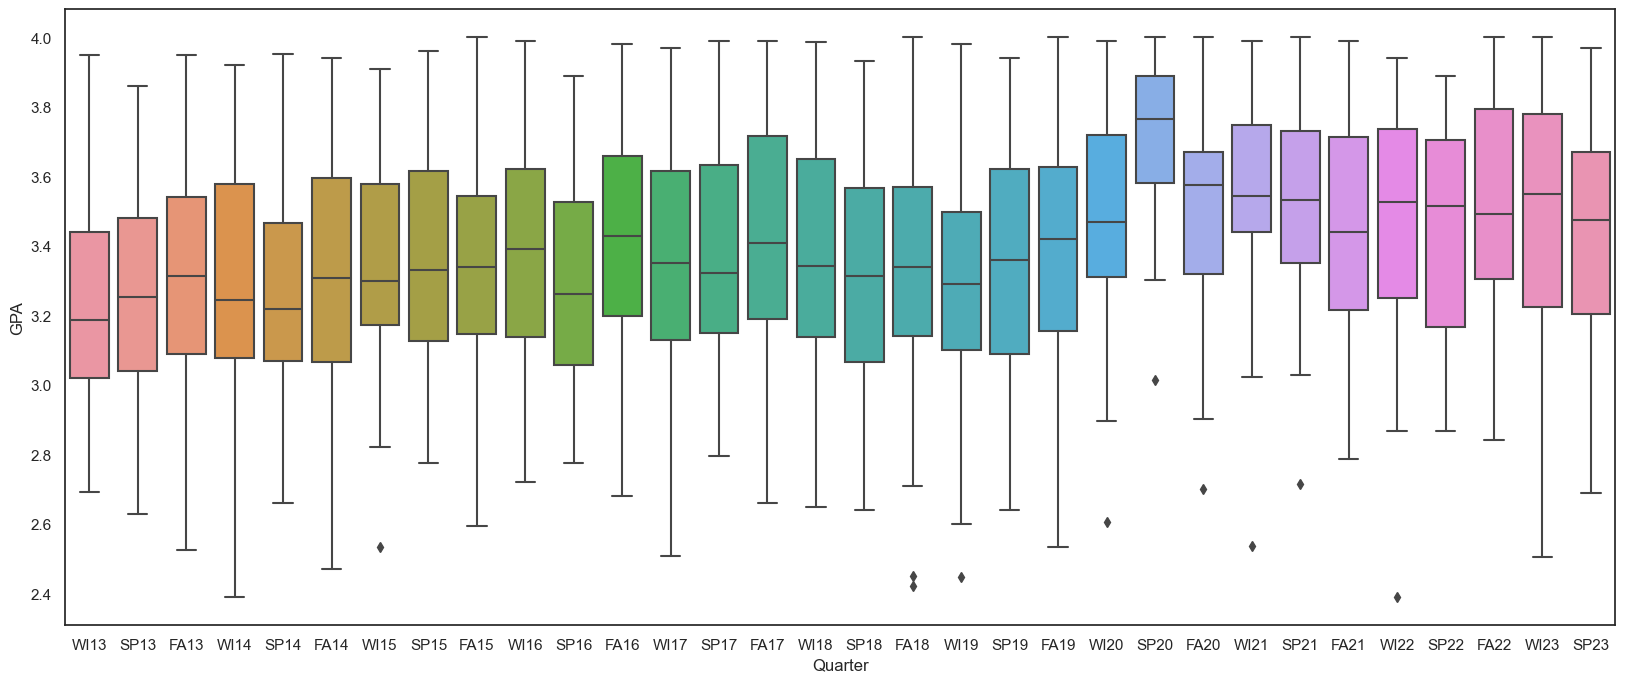

In [79]:
sns.boxplot(data=capes_sub_wo_sum[capes_sub_wo_sum["Division"]=="LD"], x="Quarter", y="GPA")

### Upper Division

<Axes: xlabel='Quarter', ylabel='GPA'>

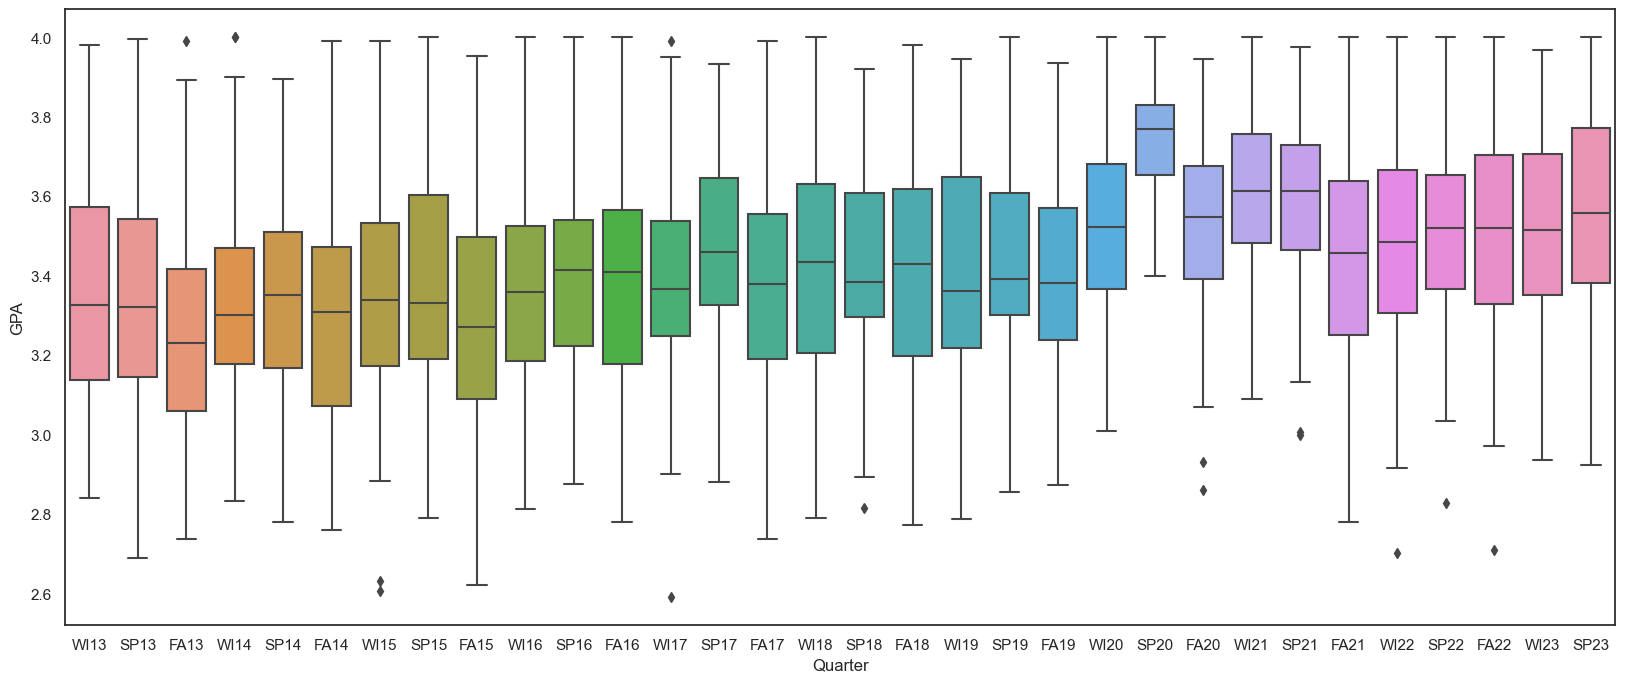

In [80]:
sns.boxplot(data=capes_sub_wo_sum[capes_sub_wo_sum["Division"]=="UD"], x="Quarter", y="GPA")

### COVID-19 Pandemic
We will consider everything during and after SP20 as the pandemic period

In [81]:
capes_sub_wo_sum["during_pandemic"] = (capes_sub["Year"] >=2021)|(capes_sub["Quarter"] == "SP20")|(capes_sub["Quarter"] == "FA20")
capes_sub_wo_sum

C:\Users\lakha\AppData\Local\Temp\ipykernel_35928\3815074080.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False
...,...,...,...,...,...,...,...
7355,SP23,ANSC,UD,2023.0,3.548889,Anthro Sociocultural Anthropology,True
7356,SP23,ANBI,UD,2023.0,2.996667,Anthropology Biological Anthropology,True
7357,SP23,ANAR,UD,2023.0,3.535000,Anthropological Archaeology,True
7358,SP23,AAS,UD,2023.0,3.920000,African American Studies,True


<Axes: xlabel='during_pandemic', ylabel='GPA'>

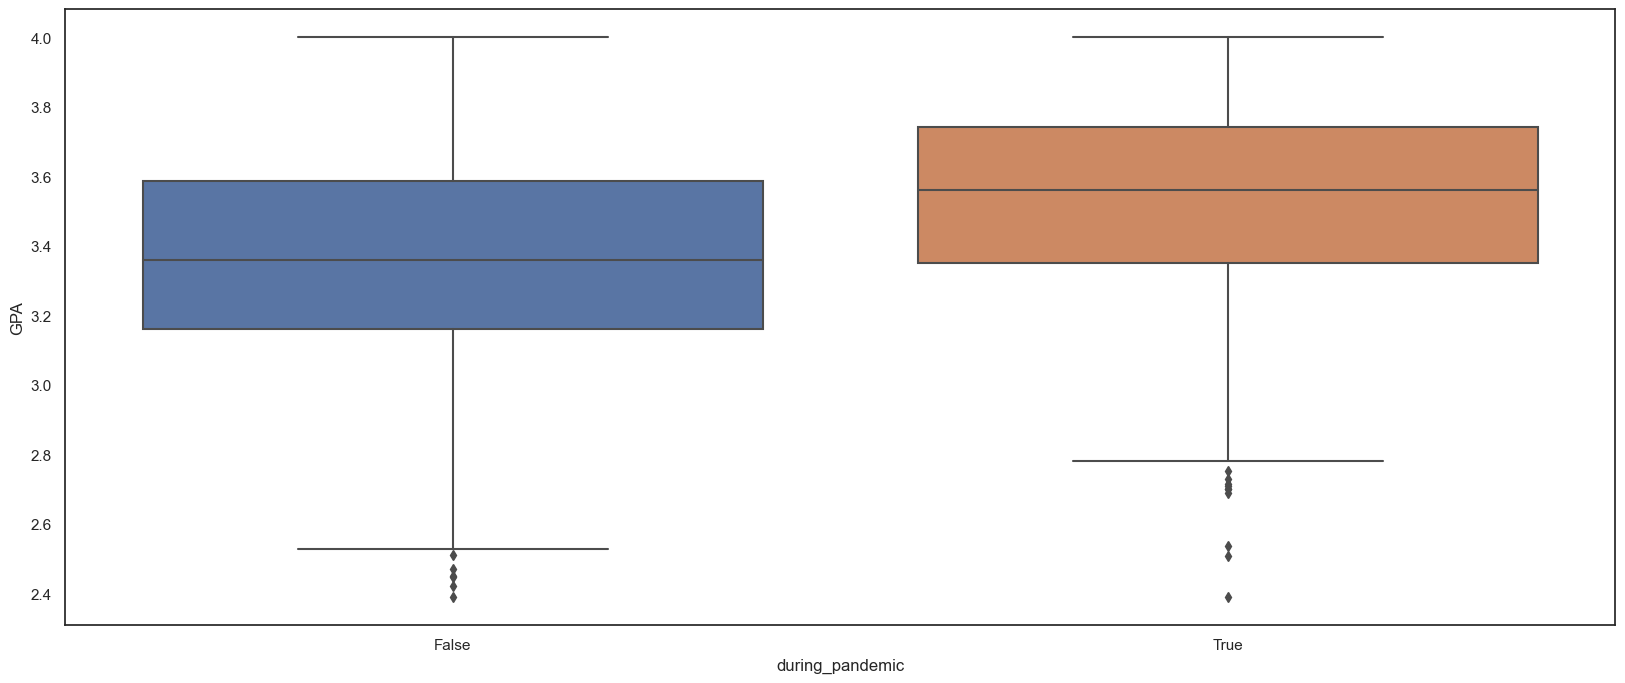

In [82]:
sns.boxplot(data=capes_sub_wo_sum, x="during_pandemic", y="GPA")

### Rise of ChatGPT
ChatGPT rose in popularity in late December, so we will consider WTR23 Quarter Onwards as ChatGPT time

In [83]:
capes_sub_wo_sum["during_chatgpt"] = (capes_sub_wo_sum["Year"] >= 2023)
capes_sub_wo_sum

C:\Users\lakha\AppData\Local\Temp\ipykernel_35928\2876471663.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic,during_chatgpt
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False,False
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False,False
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False,False
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False,False
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False,False
...,...,...,...,...,...,...,...,...
7355,SP23,ANSC,UD,2023.0,3.548889,Anthro Sociocultural Anthropology,True,True
7356,SP23,ANBI,UD,2023.0,2.996667,Anthropology Biological Anthropology,True,True
7357,SP23,ANAR,UD,2023.0,3.535000,Anthropological Archaeology,True,True
7358,SP23,AAS,UD,2023.0,3.920000,African American Studies,True,True


<Axes: xlabel='during_chatgpt', ylabel='GPA'>

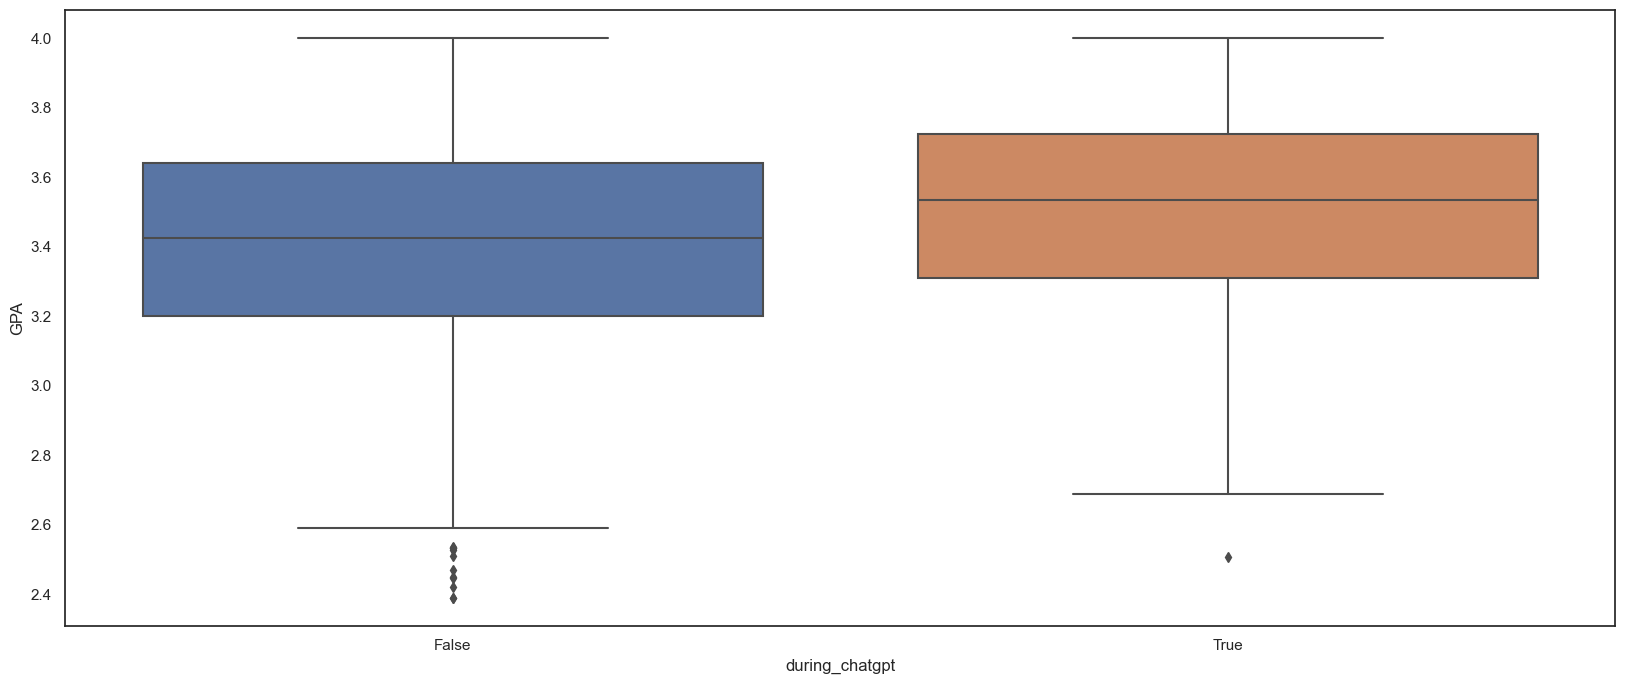

In [84]:
sns.boxplot(data=capes_sub_wo_sum, x="during_chatgpt", y="GPA")

### TA Strike
The TA Strike only happened in FA22

In [85]:
capes_sub_wo_sum["during_TA_Strike"] = (capes_sub_wo_sum["Quarter"] == "FA22")
capes_sub_wo_sum


C:\Users\lakha\AppData\Local\Temp\ipykernel_35928\3664347347.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic,during_chatgpt,during_TA_Strike
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False,False,False
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False,False,False
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False,False,False
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False,False,False
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False,False,False
...,...,...,...,...,...,...,...,...,...
7355,SP23,ANSC,UD,2023.0,3.548889,Anthro Sociocultural Anthropology,True,True,False
7356,SP23,ANBI,UD,2023.0,2.996667,Anthropology Biological Anthropology,True,True,False
7357,SP23,ANAR,UD,2023.0,3.535000,Anthropological Archaeology,True,True,False
7358,SP23,AAS,UD,2023.0,3.920000,African American Studies,True,True,False


<Axes: xlabel='during_TA_Strike', ylabel='GPA'>

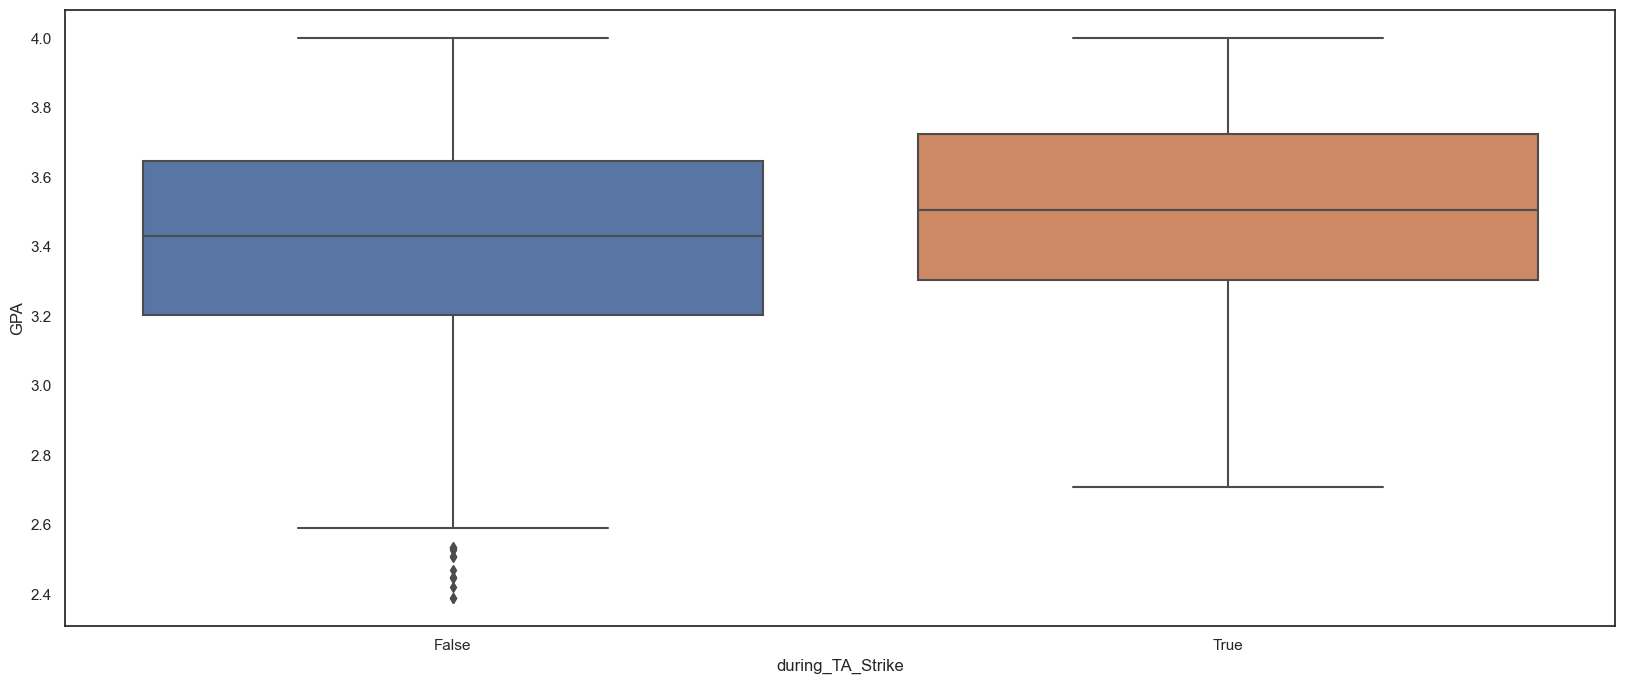

In [86]:
sns.boxplot(data=capes_sub_wo_sum, x="during_TA_Strike", y="GPA")

### By Department

In [87]:
#grouped by quarter and department to get the avg gpa per quarter per department
mean_gpa_by_dept_qtr = capes_sub_wo_sum.groupby(["Quarter", "Dept Name"])[["GPA"]].mean().reset_index()

In [88]:
mean_gpa_by_dept_qtr['Year'] = mean_gpa_by_dept_qtr['Quarter'].apply(extract_year)
mean_gpa_by_dept_qtr = mean_gpa_by_dept_qtr.get(["Year", "Quarter", "Dept Name", "GPA"])
#correcting the order of the quarters
mean_gpa_by_dept_qtr = mean_gpa_by_dept_qtr.sort_values(['Year', 'Quarter'], ascending = [True, False])
mean_gpa_by_dept_qtr.head(5)

,Year,Quarter,Dept Name,GPA
1795,2013,WI13,Anthro Sociocultural Anthropology,3.305000
1796,2013,WI13,Anthropology,3.110000
1797,2013,WI13,Anthropology Biological Anthropology,3.330000
1798,2013,WI13,Bioengineering,3.387333
1799,2013,WI13,Biology Animal Physiology and Neuroscience,3.132500


In [89]:
px.line(mean_gpa_by_dept_qtr, x="Quarter", y="GPA", color="Dept Name", category_orders={"Dept Name": np.sort(mean_gpa_by_dept_qtr["Dept Name"].unique())}
).update_traces(visible="legendonly", selector=lambda t: not t.name in ["Data Science", "Computer Science and Engineering"])
#in this plot you can compare GPA by department by looking through these department names

While the plot above depicts the growth of every course per quarter individually, we can also create a facet lineplot to visualize overall growth in GPA per year for all the departments simultaneously.

c:\Users\lakha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



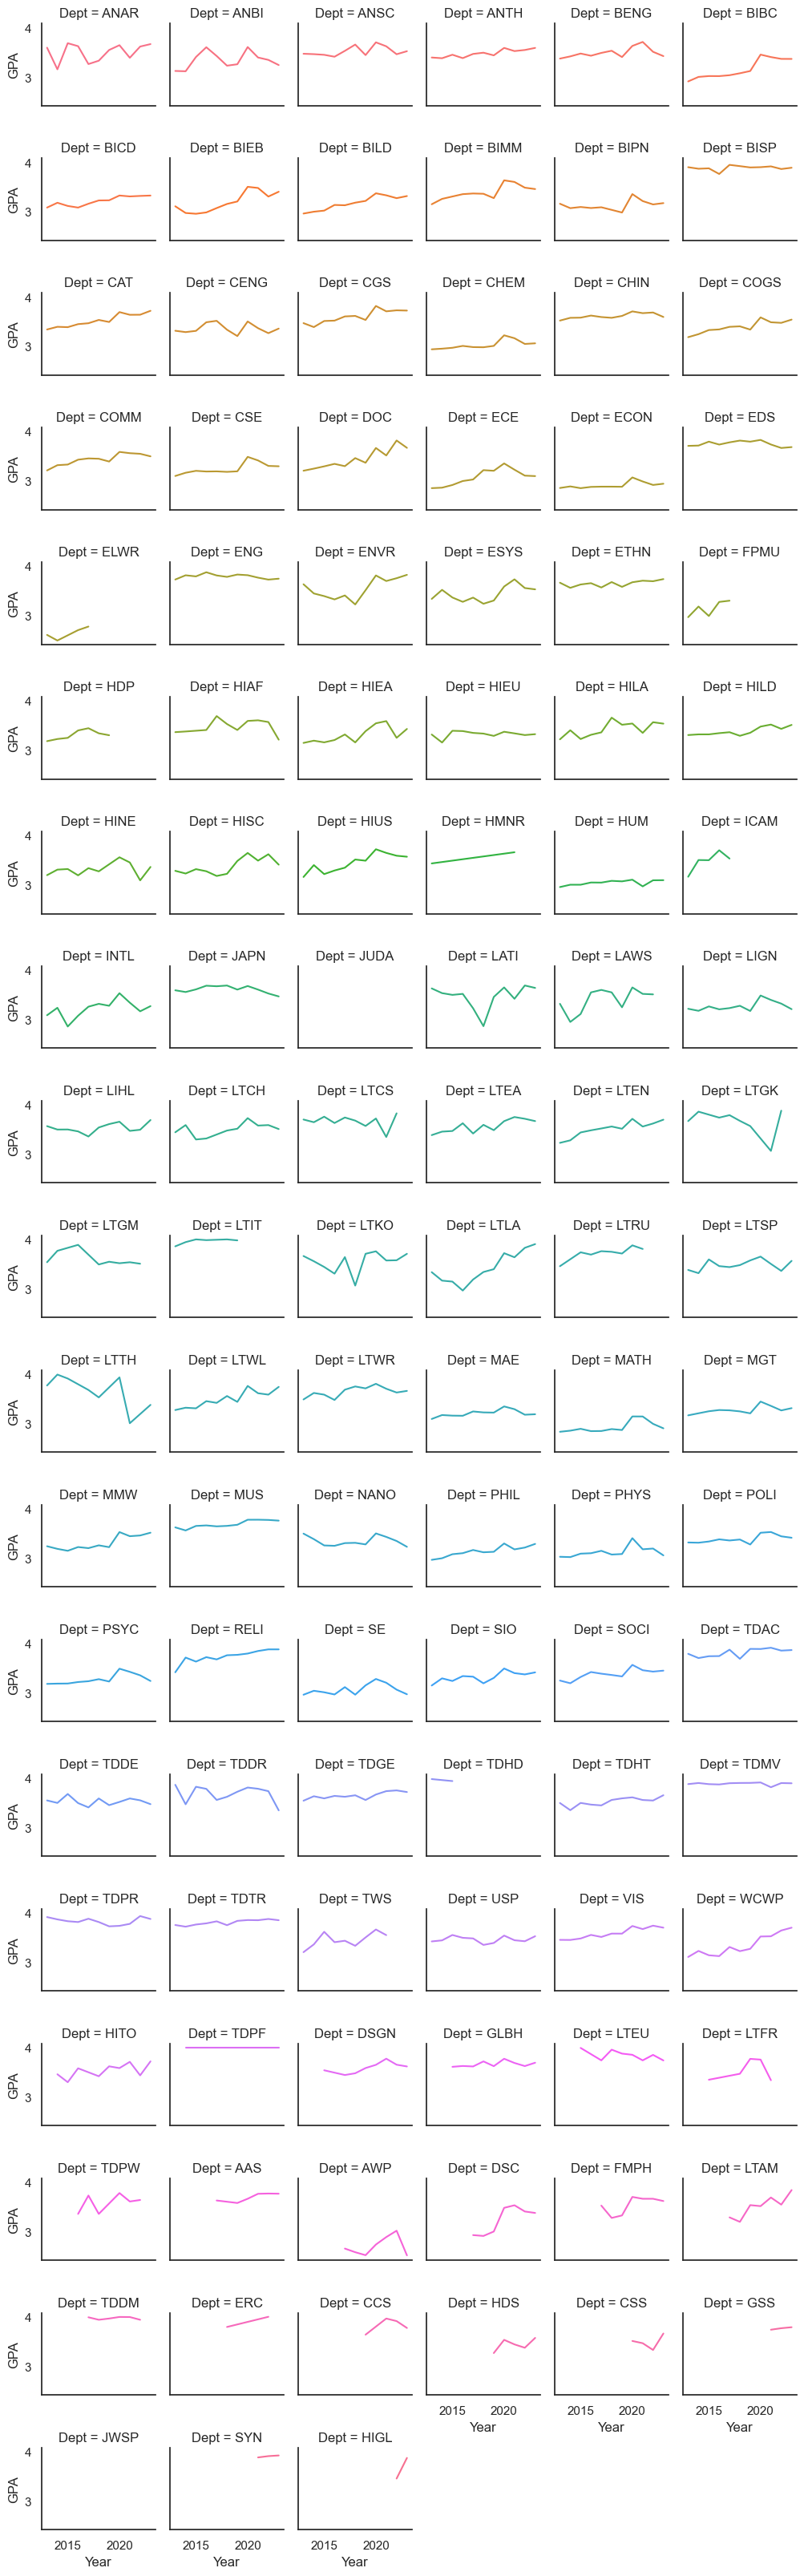

In [91]:
#creating mean by year df
mean_by_dept = capes.get(['Year','Dept','GPA']).groupby(['Year', 'Dept']).mean().reset_index()
mean_by_dept_13 = mean_by_dept[mean_by_dept.Year >= 2013]

sns.set_theme(style="white")

#creating facet grid (blank grid for every department with the axes)
img_facet = sns.FacetGrid(mean_by_dept_13, col="Dept", hue="Dept", col_wrap=6, height=1.7)

#to plot the GPA for every department in their respective grids
img_facet.map(plt.plot, "Year", "GPA")


Code reference to create image_facet from the website: https://seaborn.pydata.org/examples/many_facets.html